In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
import umap as umap
import gower


def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/market_ETL.csv'
market_ID = load_data(filepath)

market = market_ID.drop(columns=['id'])
market.head()

,idade_empresa_anos,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",...,setor_INDUSTRIA,setor_SERVIÇO,setor_nan,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,14.46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.46,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,7.09,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,6.51,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,3.20,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


We already removed the ID feature that was a string, let's see which of the remaining variables aren't categorical(booleans).

In [2]:
#checking for non integer variables
market.select_dtypes(exclude='int64')

,idade_empresa_anos
0,14.46
1,1.46
2,7.09
3,6.51
4,3.20
...,...
462293,3.25
462294,8.95
462295,20.75
462296,1.91


In [3]:
#quick check for zero features with all zero values
market.columns[(market == 0).all()]

Index([], dtype='object')

In [4]:
#creating a list of non bolean columns that require transformation
non_bolean_cols = []
for col in market.columns:
    if (len(market.loc[:,col].unique()) == 2 and market.loc[:,col].unique().max() ==1 and market.loc[:,col].unique().min()== 0)==False:
        non_bolean_cols.append(col)
        

non_bolean_cols

['idade_empresa_anos',
 'idade_maxima_socios',
 'idade_media_socios',
 'idade_minima_socios',
 'qt_filiais',
 'qt_socios',
 'qt_socios_st_regular']

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def standarize_cols(df_transform,cols):
    '''
    Input 
    Takes in a dataframe and a column being a continuous feature to standarize (mean =0, and standard deviation =1)
    
    Output
    New dataframe with the column passed standarized
    '''
    sc = StandardScaler()
    for col in cols:
        var_cont = df_transform.loc[:,col].values.reshape(-1,1)
        var_cont_standarized = sc.fit_transform(var_cont)
        df_transform.loc[:,col] = var_cont_standarized
    return df_transform;

def min_max_col(df_transform,cols):
    '''
    Input 
    Takes in a dataframe and a column being a continuous feature to normalize (min =0, and max =1)
    
    Output
    New dataframe with the column passed normalized
    '''
    mmsc = MinMaxScaler()
    for col in cols:
        var_cont = df_transform.loc[:,col].values.reshape(-1,1)
        var_cont_standarized = mmsc.fit_transform(var_cont)
        df_transform.loc[:,col] = var_cont_standarized
    return df_transform;



#Normalizing and standarizing can produce different results and only testing will prove which one is better.
#However we'll chose normalization for now.
market = min_max_col(market,non_bolean_cols)
market[non_bolean_cols]

,idade_empresa_anos,idade_maxima_socios,idade_media_socios,idade_minima_socios,qt_filiais,qt_socios,qt_socios_st_regular
0,0.135702,0.175299,0.163347,0.154762,0.0,0.004082,0.005618
1,0.013533,0.095618,0.095618,0.099206,0.0,0.000000,0.000000
2,0.066441,0.115538,0.115538,0.119048,0.0,0.000000,0.000000
3,0.060991,0.131474,0.131474,0.134921,0.0,0.000000,0.000000
4,0.029884,0.159363,0.155378,0.150794,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
462293,0.030354,0.111554,0.111554,0.115079,0.0,0.000000,0.000000
462294,0.083921,0.155378,0.151394,0.150794,0.0,0.000000,0.000000
462295,0.194813,0.282869,0.282869,0.285714,0.0,0.000000,0.000000
462296,0.017761,0.143426,0.111554,0.091270,0.0,0.016327,0.011236


In [6]:
market.qt_filiais.unique()

array([0.        , 0.01181102, 0.00393701, 0.08661417, 0.02755906,
       0.18503937, 0.2007874 , 0.00787402, 0.23228346, 0.04330709,
       0.12204724, 0.14566929, 0.01968504, 0.25590551, 0.01574803,
       0.16141732, 0.07480315, 0.58661417, 0.54330709, 0.03543307,
       0.70472441, 0.03149606, 0.06692913, 0.67322835, 0.0984252 ,
       0.02362205, 0.13385827, 0.91338583, 0.05905512, 0.19291339,
       0.80314961, 0.1023622 , 0.09055118, 0.03937008, 0.11417323,
       0.61811024, 0.47637795, 0.91732283, 0.46456693, 0.21259843,
       0.62598425, 0.68897638, 0.36220472, 0.72047244, 0.23622047,
       0.07086614, 0.94488189, 0.67716535, 0.30314961, 0.69685039,
       0.18897638, 0.2480315 , 0.17322835, 0.53543307, 0.20866142,
       0.45275591, 0.09448819, 0.76771654, 0.51574803, 0.05511811,
       0.35433071, 0.0511811 , 0.28740157, 0.21653543, 0.22440945,
       0.51968504, 0.18110236, 0.12598425, 0.27559055, 0.63779528,
       0.34645669, 0.5       , 0.12992126, 0.88188976, 0.06299

In [7]:
testing_id = market_ID.id[0]
testing_id

'a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849'

In [8]:
index = market_ID[market_ID.loc[:,'id']==testing_id].index[0]
ID_neighbour = market[index:index+1]
ID_neighbour

,idade_empresa_anos,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",...,setor_INDUSTRIA,setor_SERVIÇO,setor_nan,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,0.135702,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
#dissimilarity_matrix = gower.gower_matrix(market) this command gets us the dissimilarity matrix for all the database, 
#keep in mind that it is too big to alocate in the memory it needs to be done in chunks. 

#number of neighbours we want to return
n_top = 5

#the neareast distances of the ID we are looking for needs to be passed as a dataframe
Nearest_neighbours = gower.gower_topn(ID_neighbour, market, n = n_top)
Nearest_neighbours

{'index': array([     0, 258052, 106776, 417734, 142761], dtype=int64),
 'values': array([0.        , 0.00057673, 0.0005999 , 0.0006124 , 0.00069642],
       dtype=float32)}

In [10]:
values = (Nearest_neighbours.get('values'))
np.percentile(values,25),values.max()

(0.0005767272668890655, 0.0006964219)

Text(0.5, 0, 'Epsilon distance')

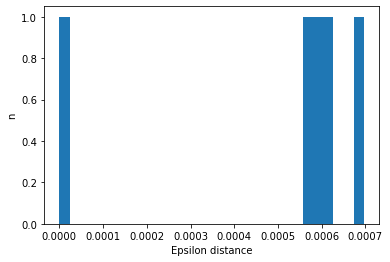

In [11]:
eps_dist = values
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance')

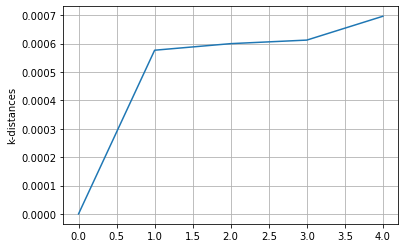

In [12]:
d = values
plt.plot(d)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [13]:
market_Id_processed = market.join(market_ID['id'])

In [20]:
def neighbours_search(Id,df,n_top):
    index = df[df.loc[:,'id']==Id].index[0]
    df = df.drop(columns=['id'])
    ID_neighbour = df[index:index+1]
    Nearest_neighbours = gower.gower_topn(ID_neighbour, df, n = n_top)
    return Nearest_neighbours;

Id = market_Id_processed.id[123456]
NN_ID = neighbours_search(Id,market_Id_processed,2)
NN_ID

{'index': array([123456,  82700], dtype=int64),
 'values': array([0.        , 0.00140389], dtype=float32)}